# A tutorial introduction into deep learning with Keras and Tensorflow.  We will use the MNIST dataset which is the 'Hello world' problem of deep learning

I always like to start my jupternotebooks with this code because it fits the display window to my screen.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### This tutrial was adapted from Deep Learning with Python Chollet, F. (2021). Deep Learning with Python (2nd ed.). Greenwich, CT, USA: Manning Publications Co.

Start with some definitions.
Numerical data in an array are called tensors.  https://en.wikipedia.org/wiki/Tensor.

Scalars are 0 dimensional tensors (a single digit). 

In [3]:
import numpy as np
x = np.array(12)
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 0 dimensions

The value of x is 12
The dimension of this tensor is 0


A 1 dimensional tensor is also called a vector

In [4]:
x = np.array([12, 1, 2, 3]) #create a vector
print('The value of x is', x)
print('The dimention of this tensor is', x.ndim) # 1 dimensions

The value of x is [12  1  2  3]
The dimention of this tensor is 1


A 2 dimensional tensor is also called a matrix

In [5]:
x = np.array([[12, 1, 2, 3],
              [5, 6, 7, 8,],
              [10, 11, 12, 12]])
print('The value of x is', x) # Print the 3 x 4 matrix
print('The dimension of this tensor is', x.ndim) # 2 dimensions

The value of x is [[12  1  2  3]
 [ 5  6  7  8]
 [10 11 12 12]]
The dimension of this tensor is 2


We can create n dimensional tensors easily, although they become difficult to visualize.
This 3D tensor is like a cube of data.  

In [6]:
x = np.array([[[12, 1, 2, 3],
               [5, 6, 7, 8,],
               [10, 11, 12, 12]],
              [[2, 2, 2, 2,],
               [3,3,3,3],
               [4,4,4,4]],
              [[5,5,5,5],
               [6,6,6,6],
               [7,7,7,7]]])
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 3 dimensional array

The value of x is [[[12  1  2  3]
  [ 5  6  7  8]
  [10 11 12 12]]

 [[ 2  2  2  2]
  [ 3  3  3  3]
  [ 4  4  4  4]]

 [[ 5  5  5  5]
  [ 6  6  6  6]
  [ 7  7  7  7]]]
The dimension of this tensor is 3


#### Reshaping tensors is important concept to understand.  We can reshape a tensor as long as it has the same number of coefficients as the initial tensor.

In [7]:
x = x.reshape(3*3*4,1)
print(x)
x = x.reshape(4, 3*3)
print(x)
x = x.reshape(2, 18)
print(x)

[[12]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [11]
 [12]
 [12]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]]
[[12  1  2  3  5  6  7  8 10]
 [11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5]
 [ 5  6  6  6  6  7  7  7  7]]
[[12  1  2  3  5  6  7  8 10 11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7]]


##### Tensors have three atributes: number of axis (dimensions), shape (length of each axis), and data type (typically we will use float32)

We can also manipulate tensors with TensorFlow

In [8]:
# Import Tensorflow as tf
import tensorflow as tf

In [9]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [10]:
# Create a Tensorflow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1421368],
       [ 0.5128755],
       [ 2.0553992]], dtype=float32)>


In [11]:
# Once the variable is createed it can be modified using assign
v2 = v.assign(tf.random.normal(shape=(3,1)))
print(v2)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[-1.4786801],
       [-1.521925 ],
       [-0.9422084]], dtype=float32)>


In [12]:
# Now we can perform some math operations on the tensors
np.dot(v, v2)

ValueError: ignored

In [13]:
# We get the above error because the shapes of v and v2 do not align properly for a dot product.
print(v.shape)
print(v2.shape)

# For a dot product to alight the column rows of X must match the rows of Y. (See Figure 2.5 in book)
# Therefore, we must transpost v2

(3, 1)
(3, 1)


In [14]:
v3 = np.transpose(v2)
print(v.shape)
print(v3.shape)

(3, 1)
(1, 3)


In [15]:
# Now the rows of v match the columns of v3 we can take the dot product
np.dot(v, v3)

array([[2.1864948, 2.2504401, 1.3932248],
       [2.2504401, 2.3162556, 1.4339705],
       [1.3932248, 1.4339705, 0.8877567]], dtype=float32)

# Let's build our first neural net

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. We will build a deep learning nerual net model to classify the 10 digits. This is the 'Hello World' problem of deep learning. 

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [18]:
train_images.shape #60,000 images that are 28 pixles by 28 pixles.

(60000, 28, 28)

In [19]:
train_images.ndim #3D tensor

3

In [20]:
print('The maximum value in the array is', train_images.max()) # The maximum value in the array is 255
print('he minimum value in the array is', train_images.min()) # The minimum value in the array is 0

The maximum value in the array is 255
he minimum value in the array is 0


In [21]:
# Get the shape, dimensions, max and min value of the test images

In [22]:
print('test image shape:', test_images.shape)
print('number of dimensions:', test_images.ndim)
print('maximum value', test_images.max())
print('minimum value:', test_images.min())

test image shape: (10000, 28, 28)
number of dimensions: 3
maximum value 255
minimum value: 0


In general the first axis in a tensor is the samples, the second axis is height, the third axis is the width, and the fourth is color channels (RGB = 3 & BW = 1)
So image data will be a 4D tensor [samples, height, width, channels] the MNIST data is 3D bacause the color channel is black and white and thus = 1
Video data will be a 5D tensor [samples, frames, height, width, channels]. By convention, time series data will be placed on the secod axis when present

Let's view one of the images.  We need to import matplotlib to view the digits 

In [23]:
import matplotlib.pyplot as plt

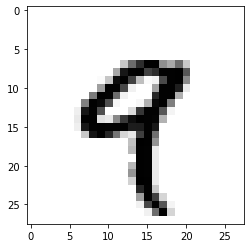

In [24]:
digit = train_images[4] # Select the fouth sample.
plt.imshow(digit, cmap=plt.cm.binary) # Show the sample.  cmap is the color map.  We will keep it black and white (binary)
plt.show()

The 4th train image looks like the number 9.  Lets make sure the label matches.

In [25]:
train_labels[4]

9

In [26]:
# Import models and layers from the tenforflow and keras libraries
from tensorflow.keras import models
from tensorflow.keras import layers

We will be working with sequential models and dense layers. More on what those mean later.  Another name for a dense layer is a fully connected layer.  The dense layer must be one dimentional. Therefore, the input shape must be reshaped into a vector. There are 60,000 test images with a shape of 28 x 28. We will reshape the matrix into a vector that is 28 * 28 == 784.

We pick the 'relu' activation function for our first layer and our output layer activation function is 'softmax' because we have a multi-classification problem.

In [27]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Now we complie the model.  We use the 'adam' optimizer and choose 'catergorical crossentropy' for the loss function because it is a multi-classification problem. We will evaluate our model accuracy.

In [28]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Now the model is built and compiled we need to process the images for the model.  The images need to be reshaped into a vector of the same dimentions as the input shape above.  We also normalize the values of the images to be between 0 and 1.

In [29]:
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/test_images.max()

print(train_images.ndim)

2


In [30]:
print('train image shape:', train_images.shape)
print('number of dimensions:', train_images.ndim)
print('maximum value', train_images.max())
print('minimum value:', train_images.min())

train image shape: (60000, 784)
number of dimensions: 2
maximum value 1.0
minimum value: 0.0


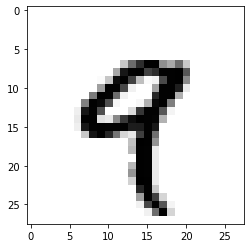

In [31]:
# We can always get our images back by reshaping to a matrix.
plt.imshow(train_images.reshape((60000,28,28))[4], cmap=plt.cm.binary)

In [32]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [33]:
# We need to convert the labels into catergorical values.
# We can check the train lables for the 4th value to ensure
# it is labeled as 9
print(train_labels[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [34]:
# Batch size is how many images to process at once. 
# Epoch is how many times to repeat the analysis.  
# Each epoch performs 500 gradient updates (60,000/120 = 500)
model.fit(train_images, train_labels, epochs = 5, batch_size = 120) 

Epoch 1/5
500/500 [==============================] - 4s 3ms/step - loss: 0.2637 - accuracy: 0.9243
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.1085 - accuracy: 0.9675
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9796
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9848
Epoch 5/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9898


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9777
test_acc: 0.9776999950408936


# Your Turn.
# Below is your assignmnet
####  Build 3 different models with activations 'relu'.  The last activation must be 'softmax' since we have a multiclass problem.  You will comple the three different models with different optimizers

In [36]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
model1.add(layers.Dense(10, activation='softmax'))

model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))


model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
model3.add(layers.Dense(10, activation='softmax'))

#### Compile your three models with three different optimizers. Page 89 - 90 of the tetbook list some different optimizers.  You can also find more optimizers and documentation here: https://keras.io/api/optimizers/
#### Use categorical_crossentropy since this problem is a multiclassification problem. Metrics will be 'accuracy'.

In [37]:
model1.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model2.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model3.compile(optimizer = 'nadam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [38]:
model1.fit(train_images, train_labels, epochs = 5, batch_size = 120)
model2.fit(train_images, train_labels, epochs = 5, batch_size = 120)
model3.fit(train_images, train_labels, epochs = 5, batch_size = 120)


Epoch 1/5
500/500 [==============================] - 2s 3ms/step - loss: 0.2636 - accuracy: 0.9237
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9683
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 5/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9897
Epoch 1/5
500/500 [==============================] - 2s 3ms/step - loss: 0.2551 - accuracy: 0.9260
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9695
Epoch 3/5
500/500 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9854
Epoch 5/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9890
Epoch 1/5


#### Test the accuracy of the model on the test images and test labels.

In [39]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('model1_test_acc:', test_acc)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('model2_test_acc:', test_acc)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('model3_test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9795
model1_test_acc: 0.9794999957084656
313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9799
model2_test_acc: 0.9799000024795532
313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9783
model3_test_acc: 0.9782999753952026


# Which optimizer gave the highest accuracy?
### Using the opiomizer that gave the highest accuracy compile 3 different models with 3 hidden layers and varying units in each hidden layer.  The first and output layers are given to you.

In [40]:
h1_model = models.Sequential()
h1_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(1028, activation='relu'))
h1_model.add(layers.Dense(1028, activation='relu'))
h1_model.add(layers.Dense(512, activation='relu'))
h1_model.add(layers.Dense(10, activation='softmax'))

h2_model = models.Sequential()
h2_model.add(layers.Dense(10, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(20, activation='relu'))
h2_model.add(layers.Dense(40, activation='relu'))
h2_model.add(layers.Dense(60, activation='relu'))
h2_model.add(layers.Dense(10, activation='softmax'))


h3_model = models.Sequential()
h3_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(512, activation='relu'))
h3_model.add(layers.Dense(512, activation='relu'))
h3_model.add(layers.Dense(512, activation='relu'))
h3_model.add(layers.Dense(10, activation='softmax'))

#### Complie the three models with the best optimizer from above.

In [41]:
h1_model.compile(optimizer = 'nadam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h2_model.compile(optimizer = 'nadam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h3_model.compile(optimizer = 'nadam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

\#### Fit the models with epochs = 5 and  batch_size = 120

In [42]:
h1_model.fit(train_images, train_labels, epochs = 5, batch_size = 120)
h2_model.fit(train_images, train_labels, epochs = 5, batch_size = 120)
h3_model.fit(train_images, train_labels, epochs = 5, batch_size = 120)


Epoch 1/5
500/500 [==============================] - 4s 5ms/step - loss: 0.2234 - accuracy: 0.9322
Epoch 2/5
500/500 [==============================] - 3s 5ms/step - loss: 0.0838 - accuracy: 0.9739
Epoch 3/5
500/500 [==============================] - 3s 5ms/step - loss: 0.0561 - accuracy: 0.9832
Epoch 4/5
500/500 [==============================] - 3s 5ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 5/5
500/500 [==============================] - 3s 5ms/step - loss: 0.0374 - accuracy: 0.9890
Epoch 1/5
500/500 [==============================] - 3s 4ms/step - loss: 0.6045 - accuracy: 0.8068
Epoch 2/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2755 - accuracy: 0.9183
Epoch 3/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2320 - accuracy: 0.9297
Epoch 4/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2085 - accuracy: 0.9378
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 0.1921 - accuracy: 0.9420
Epoch 1/5


#### Test the accuracy of the 3 models

In [43]:
test_loss, test_acc = h1_model.evaluate(test_images, test_labels)
print('h1_model_test_acc:', test_acc)

test_loss, test_acc = h2_model.evaluate(test_images, test_labels)
print('h2_model_test_acc:', test_acc)

test_loss, test_acc = h3_model.evaluate(test_images, test_labels)
print('h3_model_model_model_test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9773
h1_model_test_acc: 0.9772999882698059
313/313 [==============================] - 1s 2ms/step - loss: 0.2044 - accuracy: 0.9398
h2_model_test_acc: 0.9398000240325928
313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9779
h3_model_model_model_test_acc: 0.9779000282287598


#### Which model gave the highest accuracy?